### **SIMPLE LINEAR REGRESSION**


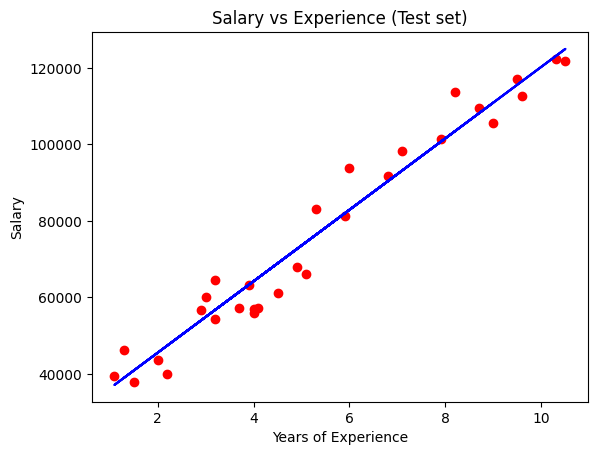

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/simple-Linear-Regression/master/Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
df = pd.read_csv('https://raw.githubusercontent.com/codebasics/py/master/ML/2_linear_reg_multivariate/homeprices.csv')
df


,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
df.bedrooms.median()

4.0

In [ ]:
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df.drop('price',axis='columns'),df.price)

LinearRegression()

In [ ]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
reg.intercept_

221323.00186540396

**Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old**

In [ ]:
reg.predict([[3000, 3, 40]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [ ]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

498408.25157402386

**Find price of home with 2500 sqr ft area, 4 bedrooms, 5 year old**

In [ ]:
reg.predict([[2500, 4, 5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([578876.03748933])

### **DECISION TREE**

In [ ]:
import numpy as np
import pandas as pd
# Importing data

df = pd.read_csv("https://raw.githubusercontent.com/milaan9/Python_Decision_Tree_and_Random_Forest/main/dataset/playgolf_data.csv")
df

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [ ]:
df.dtypes

Outlook        object
Temperature    object
Humidity       object
Wind           object
PlayGolf       object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   PlayGolf     14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [ ]:
# Converting categorical variables into dummies/indicator variables

df_getdummy=pd.get_dummies(data=df, columns=['Temperature', 'Humidity', 'Outlook', 'Wind'])
df_getdummy

,PlayGolf,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Wind_Strong,Wind_Weak
0,No,0,1,0,1,0,0,0,1,0,1
1,No,0,1,0,1,0,0,0,1,1,0
2,Yes,0,1,0,1,0,1,0,0,0,1
3,Yes,0,0,1,1,0,0,1,0,0,1
4,Yes,1,0,0,0,1,0,1,0,0,1
5,No,1,0,0,0,1,0,1,0,1,0
6,Yes,1,0,0,0,1,1,0,0,1,0
7,No,0,0,1,1,0,0,0,1,0,1
8,Yes,1,0,0,0,1,0,0,1,0,1
9,Yes,0,0,1,0,1,0,1,0,0,1


In [ ]:
# Separating the training set and test sets
from sklearn.model_selection import train_test_split
X = df_getdummy.drop('PlayGolf',axis=1)
y = df_getdummy['PlayGolf']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
# importing Decision Tree Classifier via sklean
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=2)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

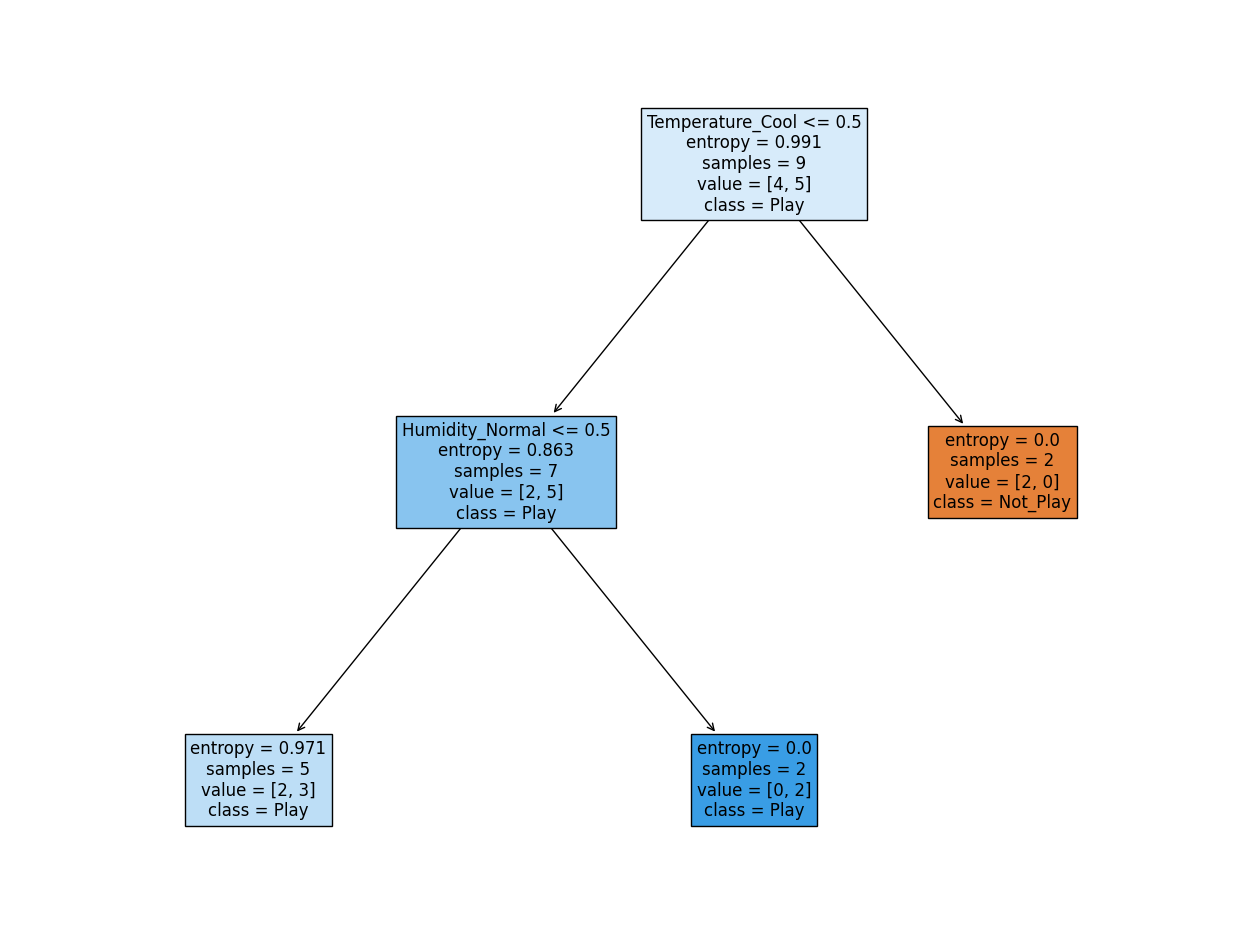

In [ ]:
# visualising the decision tree diagram
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree, feature_names=df_getdummy.columns, fontsize=12, filled=True,
              class_names=['Not_Play', 'Play'])

### **SUPPORT VECTOR MACHINE**

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [ ]:
df[df.target==2].head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [ ]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [ ]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
45,4.8,3.0,1.4,0.3,0
46,5.1,3.8,1.6,0.2,0
47,4.6,3.2,1.4,0.2,0
48,5.3,3.7,1.5,0.2,0
49,5.0,3.3,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [ ]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Sepal length vs Sepal Width (Setosa vs Versicolor)

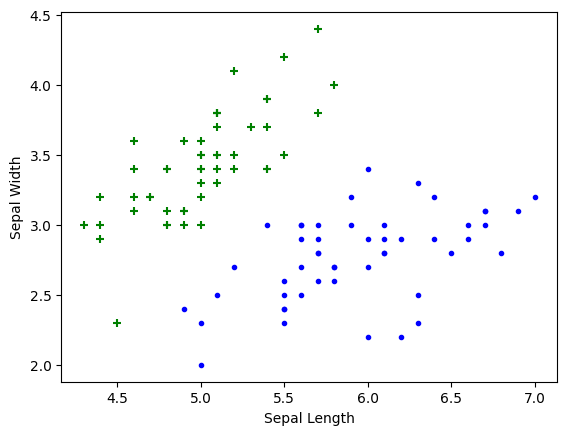

In [ ]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('HR_comma_sep.csv')

# Select the features and target variable
X = data[['satisfaction_level']]
y = data[['last_evaluation']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable using the test data
y_pred = model.predict(X_test)

# Print the coefficients and intercept of the model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [[0.0730457]]
Intercept: [0.67212993]


Coefficients: [[ 1.89074277e-02 -1.57516806e-02 -7.73630390e-04  1.62274209e-05
   7.71727901e-03  1.43060927e-02]]
Intercept: [-0.00867321]


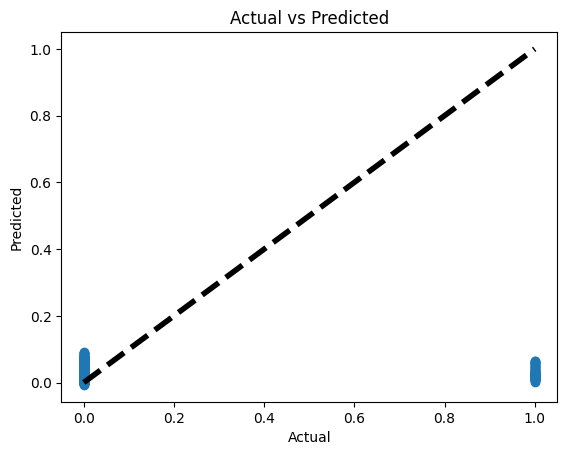

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('HR_comma_sep.csv')

# Select the features and target variable
X = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident']]
y = data[['promotion_last_5years']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable using the test data
y_pred = model.predict(X_test)

# Print the coefficients and intercept of the model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
# Plot the actual values against the predicted values
plt.scatter(y_test, y_pred)

# Plot the regression line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

# Set the plot title and axis labels
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Show the plot
plt.show()


### **RNN WITH BIDIRECTIONAL LSTM**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

tf.__version__

'2.12.0'

In [ ]:
default_reber_grammar=[
    [("B",1)],  #(state 0) =B=> (state 1)
    [("T", 2),("P", 3)],  # (state 1) =T=> (state 2) or =P=> (state 3)
    [("X", 5), ("S", 2)], # (state 2) =X=> (state 5) or =S=> (state 2)
    [("T", 3), ("V", 4)], # (state 3) =T=> (state 3) or =V=> (state 4)
    [("V", 6), ("P", 5)], # (state 4) =V=> (state 6) or =P=> (state 5)
    [("X",3), ("S", 6)],  # (state 5) =X=> (state 3) or =S=> (state 6)
    [("E", None)]         # (state 6) =E=> <EOS>

]

In [ ]:
embedded_reber_grammar=[
    [("B",1)],  #(state 0) =B=> (state 1)
    [("T", 2),("P", 3)],  # (state 1) =T=> (state 2) or =P=> (state 3)
    [(default_reber_grammar,4)], # (state 2) =REBER=> (state 4)
    [(default_reber_grammar,5)], # (state 3) =REBER=> (state 5)
    [("P", 6)], # (state 4) =P=> (state 6)
    [("T",6)],  # (state 5) =T=> (state 3)
    [("E", None)]         # (state 6) =E=> <EOS>

]

In [ ]:
def generate_valid_string(grammar):
    state = 0
    output = []
    while state is not None:
        char, state = grammar[state][np.random.randint(len(grammar[state]))]
        if isinstance(char, list):  # embedded reber
            char = generate_valid_string(char)
        output.append(char)
    return "".join(output)


In [ ]:
def generate_corrupted_string(grammar, chars='BTSXPVE'):
    '''Substitute one character to violate the grammar'''
    good_string = generate_valid_string(grammar)
    idx = np.random.randint(len(good_string))
    good_char = good_string[idx]
    bad_char = np.random.choice(sorted(set(chars)-set(good_char)))
    return good_string[:idx]+bad_char+good_string[idx+1:]

In [ ]:
chars='BTSXPVE'
chars_dict = {a:i for i,a in enumerate(chars)}
chars_dict

{'B': 0, 'T': 1, 'S': 2, 'X': 3, 'P': 4, 'V': 5, 'E': 6}

In [ ]:
def str2onehot(string, num_steps=12, chars_dict=chars_dict):
    res = np.zeros((num_steps, len(chars_dict)))
    for i in range(min(len(string), num_steps)):
        c = string[i]
        res[i][chars_dict[c]] = 1
    return res

In [ ]:
def generate_data(data_size=10000, grammar=embedded_reber_grammar, num_steps=None):
    good = [generate_valid_string(grammar) for _ in range(data_size//2)]
    bad = [generate_corrupted_string(grammar) for _ in range(data_size//2)]
    all_strings = good+bad
    if num_steps is None:
        num_steps = max([len(s) for s in all_strings])
    X = np.array([str2onehot(s) for s in all_strings])
    l = np.array([len(s) for s in all_strings])
    y = np.concatenate((np.ones(len(good)), np.zeros((len(bad))))).reshape(-1, 1)
    idx = np.random.permutation(data_size)
    return X[idx], l[idx], y[idx]

In [ ]:
np.random.seed(42)
X_train, seq_lens_train, y_train = generate_data(10000)
X_val, seq_lens_val, y_val = generate_data(5000)
X_train.shape, X_val.shape

((10000, 12, 7), (5000, 12, 7))

In [ ]:
x = layers.Input(shape=(12, 7)) # we define our input's shape
# first we define our RNN cells to use in the RNN model
# let's keep the model simple ...
cell = layers.SimpleRNNCell(4, activation='tanh')  # ... by just using 4 units (like 4 units in hidden layers)
rnn = layers.RNN(cell)
rnn_output = rnn(x)

In [ ]:
output = layers.Dense(units=1, activation='sigmoid')(rnn_output)

In [ ]:
# let's compile the model
model = keras.Model(inputs=x, outputs=output)
# loss is binary cropss entropy since this is a binary classification task
# and evaluation metric as f1
model.compile(loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12, 7)]           0         
                                                                 
 rnn (RNN)                   (None, 4)                 48        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# we train the model for 100 epochs
# verbose level 2 displays more info while trianing
H = model.fit(X_train, y_train, epochs=100, verbose=2, validation_data=(X_val, y_val))

Epoch 1/100
313/313 - 3s - loss: 0.7128 - accuracy: 0.5124 - val_loss: 0.7022 - val_accuracy: 0.5256 - 3s/epoch - 9ms/step
Epoch 2/100
313/313 - 1s - loss: 0.6958 - accuracy: 0.5265 - val_loss: 0.6944 - val_accuracy: 0.5604 - 1s/epoch - 4ms/step
Epoch 3/100
313/313 - 1s - loss: 0.6888 - accuracy: 0.5460 - val_loss: 0.6877 - val_accuracy: 0.5652 - 1s/epoch - 4ms/step
Epoch 4/100
313/313 - 1s - loss: 0.6842 - accuracy: 0.5859 - val_loss: 0.6848 - val_accuracy: 0.5182 - 1s/epoch - 4ms/step
Epoch 5/100
313/313 - 1s - loss: 0.6817 - accuracy: 0.6012 - val_loss: 0.6824 - val_accuracy: 0.5954 - 1s/epoch - 4ms/step
Epoch 6/100
313/313 - 1s - loss: 0.6795 - accuracy: 0.6127 - val_loss: 0.6800 - val_accuracy: 0.6056 - 1s/epoch - 4ms/step
Epoch 7/100
313/313 - 1s - loss: 0.6767 - accuracy: 0.6161 - val_loss: 0.6770 - val_accuracy: 0.6170 - 1s/epoch - 4ms/step
Epoch 8/100
313/313 - 2s - loss: 0.6732 - accuracy: 0.6225 - val_loss: 0.6738 - val_accuracy: 0.6228 - 2s/epoch - 6ms/step
Epoch 9/100
313/

In [ ]:
def plot_results(H):
    results = pd.DataFrame({"Train Loss": H.history['loss'], "Validation Loss": H.history['val_loss'],
              "Train Accuracy": H.history['accuracy'], "Validation Accuracy": H.history['val_accuracy']
             })
    fig, ax = plt.subplots(nrows=2, figsize=(16, 9))
    results[["Train Loss", "Validation Loss"]].plot(ax=ax[0])
    results[["Train Accuracy", "Validation Accuracy"]].plot(ax=ax[1])
    ax[0].set_xlabel("Epoch")
    ax[1].set_xlabel("Epoch")
    plt.show()

**Now we will apply bidirectional LSTM (that looks both backward and forward in the sentence) for text classification.**

In [ ]:
!pip install -q tensorflow_datasets

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [ ]:
train = train_dataset.take(4000)
test = test_dataset.take(1000)

In [ ]:
# to shuffle the data ...
BUFFER_SIZE = 4000 # we will put all the data into this big buffer, and sample randomly from the buffer
BATCH_SIZE = 128  # we will read 128 reviews at a time

train = train.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test = test.batch(BATCH_SIZE)

In [ ]:
train = train.prefetch(BUFFER_SIZE)
test = test.prefetch(BUFFER_SIZE)

In [ ]:
VOCAB_SIZE=1000 # assuming our vocabulary is just 1000 words

encoder = layers.experimental.preprocessing.TextVectorization(max_tokens=VOCAB_SIZE)

encoder.adapt(train.map(lambda text, label: text)) # we just encode the text, not the labels


In [ ]:
# here are the first 20 words in our 1000-word vocabulary
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'i', 'it',
       'this', 'that', 'br', 'was', 'as', 'with', 'for', 'but', 'movie'],
      dtype='<U14')

In [ ]:
example, label = list(train.take(1))[0] # that's one batch
len(example)

128

In [ ]:
example[0].numpy()

b"This is a poem on film, wonderfully presented and photographed with sensitive artistry. It captures the atmosphere of the time and place perfectly. (Italy's lake district in the twenties.) It's a love story with a twist. The characters are unique and believable. The settings are deliciously exotic. Some of the scenes --- the funeral boat in the fog --- the high long shot of the chess table in the centre of an intricately patterned tile floor --- are beautiful images. And rather than the mandatory happy ending, this story has a bitter sweet one. If film is an art, this is close to a masterpiece.<br /><br />"

In [ ]:
encoded_example = encoder(example[:1]).numpy()
encoded_example

array([[ 11,   7,   4,   1,  21,  20,   1,   1,   3,   1,  16,   1,   1,
         10,   1,   2, 799,   5,   2,  59,   3, 292, 931,   1,   1,   1,
          8,   2,   1,  30,   4, 113,  68,  16,   4, 775,   2, 103,  24,
        999,   3, 807,   2,   1,  24,   1,   1,  47,   5,   2, 142,   2,
          1,   1,   8,   2,   1,   2, 303, 217, 341,   5,   2,   1,   1,
          8,   2,   1,   5,  35,   1,   1,   1,   1,  24, 294,   1,   3,
        235,  71,   2,   1, 659, 265,  11,  68,  46,   4,   1,   1,  29,
         43,  20,   7,  35, 468,  11,   7, 526,   6,   4,   1,  13]])

In [ ]:
model = tf.keras.Sequential([
    encoder, # the encoder
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(layers.LSTM(64)), # making LSTM bidirectional
    tf.keras.layers.Dense(32, activation='relu'), # FC layer for the classification part
    tf.keras.layers.Dense(1) # final FC layer

])

In [ ]:
sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

1/1 [==============================] - 6s 6s/step
[0.01904408]


**Training the model**

In [ ]:
# we will use binary cross entropy again because this is a binary classification task (positive or negative)
# we also did not apply a sigmoid activation function at the last FC layer, so we specify that the
# are calculating the cross entropy from logits
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    # adam optimizer is more efficient (not always the most accurate though)
    optimizer=tf.keras.optimizers.Adam(1e-4),
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 134,209
Trainable params: 134,209
Non-trai

In [ ]:
H2 = model.fit(train, epochs=25,
                    validation_data=test)

Epoch 1/25
32/32 [==============================] - 182s 5s/step - loss: 0.6930 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.5030
Epoch 2/25
32/32 [==============================] - 161s 5s/step - loss: 0.6921 - accuracy: 0.4967 - val_loss: 0.6926 - val_accuracy: 0.5030
Epoch 3/25
32/32 [==============================] - 177s 6s/step - loss: 0.6911 - accuracy: 0.4967 - val_loss: 0.6920 - val_accuracy: 0.5030
Epoch 4/25
32/32 [==============================] - 165s 5s/step - loss: 0.6894 - accuracy: 0.4967 - val_loss: 0.6906 - val_accuracy: 0.5030
Epoch 5/25
32/32 [==============================] - 176s 6s/step - loss: 0.6864 - accuracy: 0.4967 - val_loss: 0.6873 - val_accuracy: 0.5030
Epoch 6/25
32/32 [==============================] - 177s 6s/step - loss: 0.6766 - accuracy: 0.4967 - val_loss: 0.6677 - val_accuracy: 0.5070
Epoch 7/25
32/32 [==============================] - 166s 5s/step - loss: 0.6033 - accuracy: 0.6438 - val_loss: 0.5964 - val_accuracy: 0.7220
Epoch 8/25
32

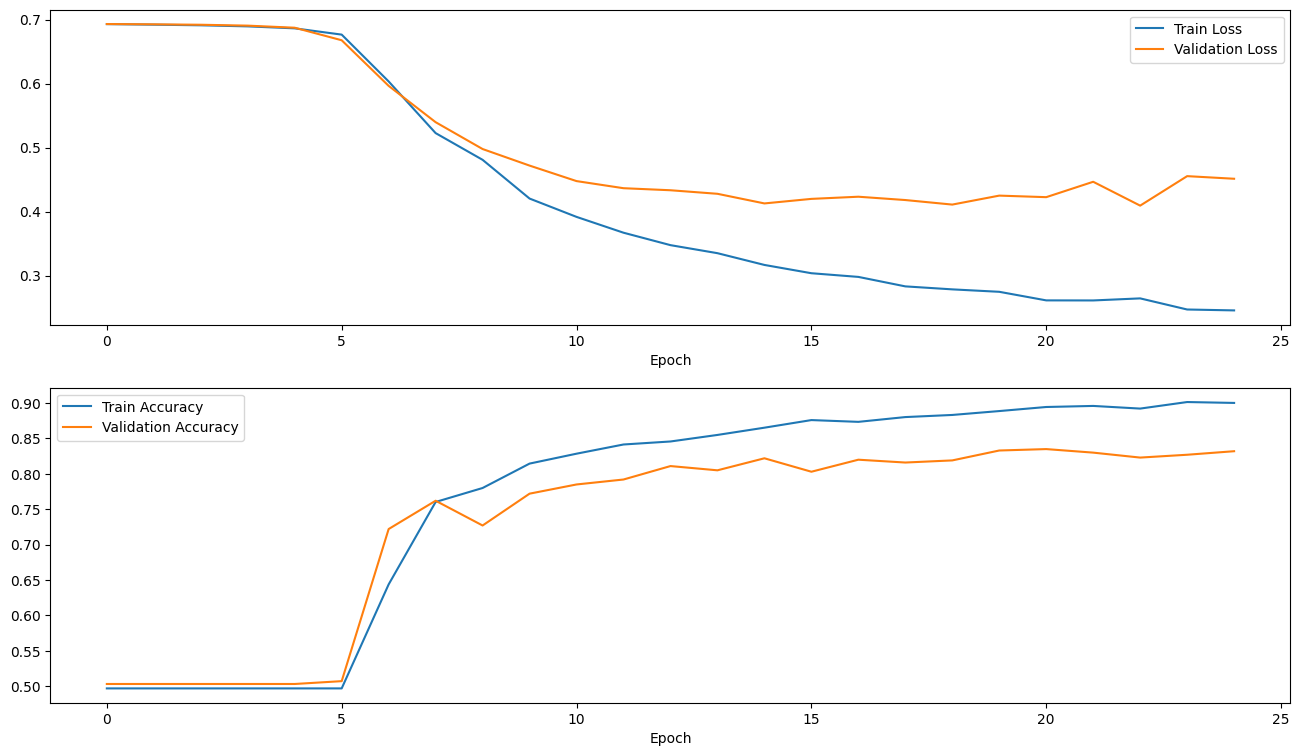

In [ ]:
plot_results(H2)

### **Calculating Mean Median Mode of a Dataset**

In [ ]:
import pandas as pd

# Import the dataset (assuming it's in a CSV file)
df = pd.read_csv('HR_comma_sep.csv')

# Calculate the mean for each column
mean = df.mean()
print("Mean for each column:\n", mean)

# Calculate the median for each column
median = df.median()
print("Median for each column:\n", median)

# Calculate the mode for each column
mode = df.mode()
print("Mode for each column:\n", mode)




Mean for each column:
 satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64
Median for each column:
 satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64
Mode for each column:
    satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                 0.1             0.55             4.0                   135   
1                 NaN              NaN             NaN                   156   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                 3.0            0.0  

<ipython-input-12-49d38fd97eb0>:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()
<ipython-input-12-49d38fd97eb0>:11: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  median = df.median()


### **Regularization**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("Advertising.csv")
X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape, X_test.shape)

(140, 3) (60, 3)


In [ ]:
#Ridge Regression:

 #Modelling with default Parameters:

from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
#Predictions and Evaluation Of Ridge Regression:

test_predictions = ridge_model.predict(X_test)
train_predictions = ridge_model.predict(X_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
estimator = Ridge()
estimator = Ridge()
param_grid = {"alpha":list(range(1,11))}
model_hp = GridSearchCV(estimator, param_grid, cv = 5)
model_hp.fit(X_train, y_train)
model_hp.best_params_


{'alpha': 10}

In [ ]:
#Hyperparameter Tuning of Ridge : Identifying the best alpha value for Ridge Regression:

from sklearn.model_selection import GridSearchCV
estimator = Ridge()
estimator = Ridge()
param_grid = {"alpha":list(range(1,11))}
model_hp = GridSearchCV(estimator, param_grid, cv = 5)
model_hp.fit(X_train, y_train)
model_hp.best_params_
#Lasso Regularization:

#Modeling of Lasso Regularization:

from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
#Predictions and Evaluation Of Lasso Regression:

test_predictions = lasso_model.predict(X_test)
train_predictions = lasso_model.predict(X_train)
from sklearn.metrics import mean_squared_error
train_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
test_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
print("train RMSE:", train_rmse)
print("test RMSE:", test_rmse)
#Hyperparameter Tuning of Lasso:

#Identifying the best alpha value for Lasso Regression:

param_grid = {"alpha": list(range(1,11))}
model_hp = GridSearchCV(estimator, param_grid, cv =5)
model_hp.fit(X_train, y_train)
model_hp.best_estimator_
#Elastic Net Regularization:

#modeling of Elastic Net Regularization:

from sklearn.linear_model import ElasticNet
enr_model = ElasticNet(alpha=2, l1_ratio = 1)
enr_model.fit(X_train, y_train)
#Predictions and Evaluation Of Elastic Net:

test_predictions = enr_model.predict(X_test)
train_predictions = enr_model.predict(X_train)
from sklearn.metrics import mean_squared_error
train_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
test_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
print("train RMSE:", train_rmse)
print("test RMSE:", test_rmse)


#Hyperparameter Tuning of Elastic Net: Identifying the best alpha value for Elastic Net:

from sklearn.model_selection import GridSearchCV
enr_hp = GridSearchCV(estimator, param_grid)
enr_hp.fit(X_train, y_train)
enr_hp.best_params_
param_grid = { "alpha" : [0, 0.1, 0.2, 1, 2, 3, 5, 10],
"l1_ratio" : [0.1, 0.5, 0.75, 0.9, 0.95, 1]}
estimator = ElasticNet()

train RMSE: 1.5903008459656902
test RMSE: 1.6866227172174735
train RMSE: 1.5904709347754258
test RMSE: 1.691475338184705


### **KNN**

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[64  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



### **SUPPORT VECTOR MACHINE**

[[66  2]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



<ipython-input-4-1f7f51f85ccf>:48: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


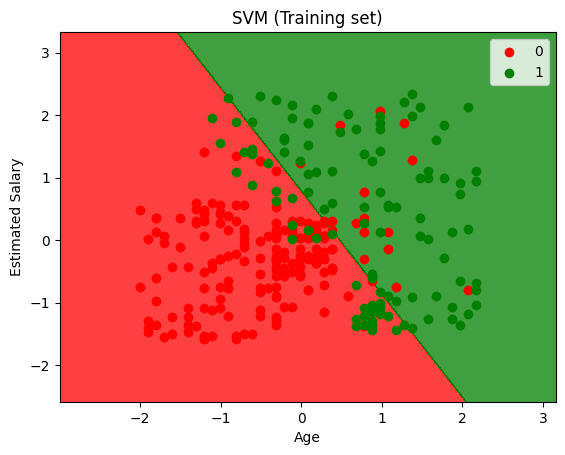

<ipython-input-4-1f7f51f85ccf>:66: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


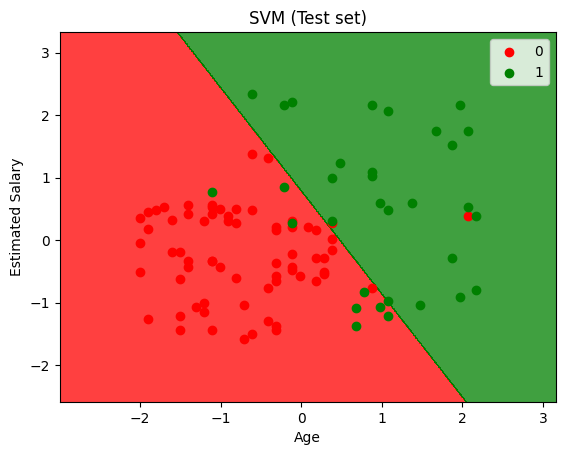

In [ ]:
#Day13: Support Vector Machine (SVM)

#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

#Predicting the Test set results
y_pred = classifier.predict(X_test)

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

#Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### **LOGISTIC REGRESSION**

[[65  3]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



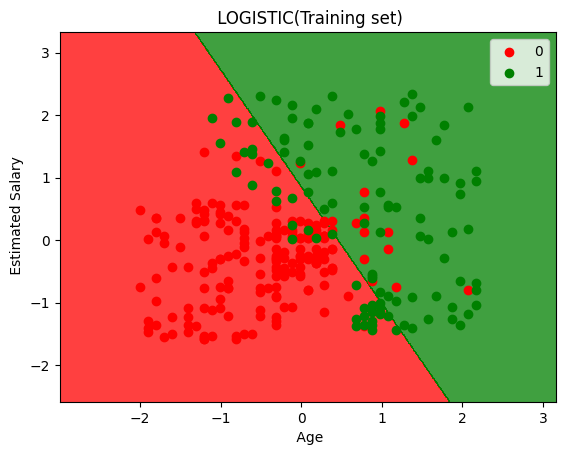

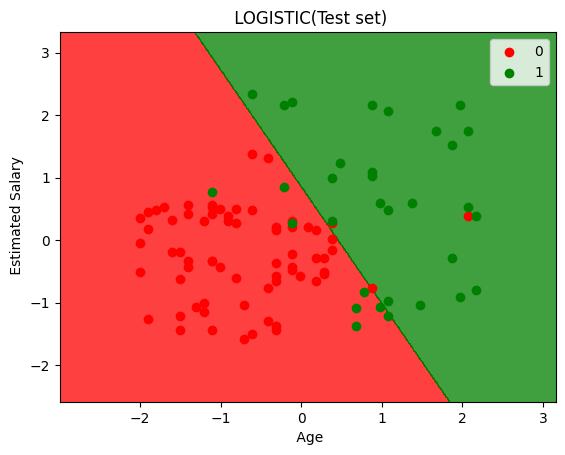

In [ ]:
# Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)  # print confusion_matrix
print(classification_report(y_test, y_pred))   # print classification report

#Visualization
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np. meshgrid(np. arange(start=X_set[:,0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                   np. arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np. unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c = ListedColormap(('red', 'green'))(i), label=j)

plt. title(' LOGISTIC(Training set)')
plt. xlabel(' Age')
plt. ylabel(' Estimated Salary')
plt. legend()
plt. show()

X_set,y_set=X_test,y_test
X1,X2=np. meshgrid(np. arange(start=X_set[:,0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                   np. arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np. unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c = ListedColormap(('red', 'green'))(i), label=j)

plt. title(' LOGISTIC(Test set)')
plt. xlabel(' Age')
plt. ylabel(' Estimated Salary')
plt. legend()
plt. show()

### **Gradient Descent**

100 epochs elapsed
Current accuracy is : 0.9836456109008862
Do you want to stop (y/*)??*
200 epochs elapsed
Current accuracy is : 0.9876439126076564
Do you want to stop (y/*)??*
300 epochs elapsed
Current accuracy is : 0.99066471424142
Do you want to stop (y/*)??*
400 epochs elapsed
Current accuracy is : 0.9929469938640652
Do you want to stop (y/*)??*
500 epochs elapsed
Current accuracy is : 0.9946713044635174
Do you want to stop (y/*)??*
600 epochs elapsed
Current accuracy is : 0.9959740576467305
Do you want to stop (y/*)??*
700 epochs elapsed
Current accuracy is : 0.9969583152723063
Do you want to stop (y/*)??*
800 epochs elapsed
Current accuracy is : 0.9977019427575331
Do you want to stop (y/*)??*
900 epochs elapsed
Current accuracy is : 0.9982637690745618
Do you want to stop (y/*)??*
1000 epochs elapsed
Current accuracy is : 0.9986882407580014
Do you want to stop (y/*)??*
1100 epochs elapsed
Current accuracy is : 0.9990089381062405
Do you want to stop (y/*)??y


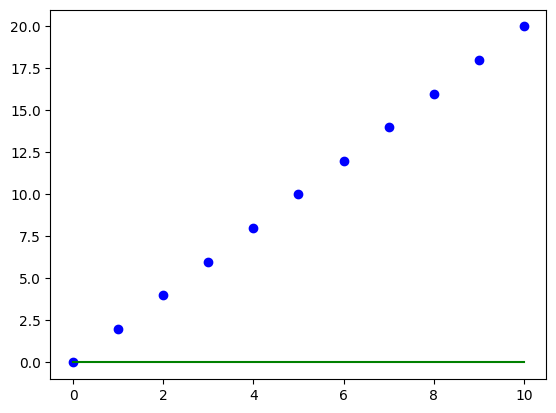

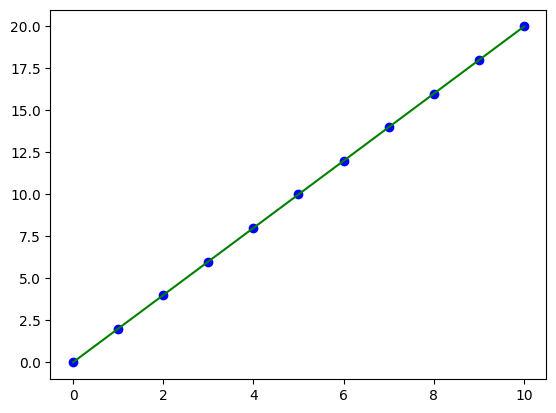

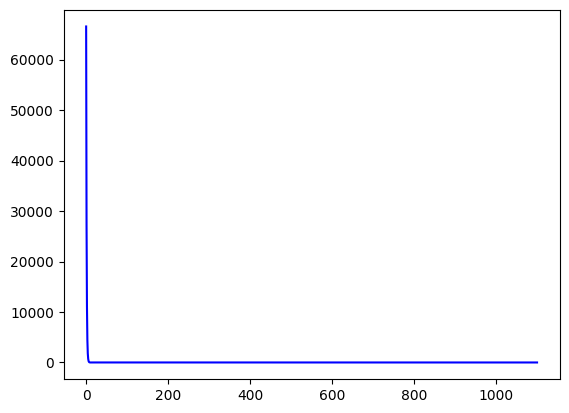

In [ ]:
# Implementation of gradient descent in linear regression
import numpy as np
import matplotlib.pyplot as plt


class Linear_Regression:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.b = [0, 0]

    def update_coeffs(self, learning_rate):
        Y_pred = self.predict()
        Y = self.Y
        m = len(Y)
        self.b[0] = self.b[0] - (learning_rate * ((1/m) *
                                                  np.sum(Y_pred - Y)))

        self.b[1] = self.b[1] - (learning_rate * ((1/m) *
                                                  np.sum((Y_pred - Y) * self.X)))

    def predict(self, X=[]):
        Y_pred = np.array([])
        if not X:
            X = self.X
        b = self.b
        for x in X:
            Y_pred = np.append(Y_pred, b[0] + (b[1] * x))

        return Y_pred

    def get_current_accuracy(self, Y_pred):
        p, e = Y_pred, self.Y
        n = len(Y_pred)
        return 1-sum(
            [
                abs(p[i]-e[i])/e[i]
                for i in range(n)
                if e[i] != 0]
        )/n
    # def predict(self, b, yi):

    def compute_cost(self, Y_pred):
        m = len(self.Y)
        J = (1 / 2*m) * (np.sum(Y_pred - self.Y)**2)
        return J

    def plot_best_fit(self, Y_pred, fig):
        f = plt.figure(fig)
        plt.scatter(self.X, self.Y, color='b')
        plt.plot(self.X, Y_pred, color='g')
        f.show()


def main():
    X = np.array([i for i in range(11)])
    Y = np.array([2*i for i in range(11)])

    regressor = Linear_Regression(X, Y)

    iterations = 0
    steps = 100
    learning_rate = 0.01
    costs = []

    # original best-fit line
    Y_pred = regressor.predict()
    regressor.plot_best_fit(Y_pred, 'Initial Best Fit Line')

    while 1:
        Y_pred = regressor.predict()
        cost = regressor.compute_cost(Y_pred)
        costs.append(cost)
        regressor.update_coeffs(learning_rate)

        iterations += 1
        if iterations % steps == 0:
            print(iterations, "epochs elapsed")
            print("Current accuracy is :",
                  regressor.get_current_accuracy(Y_pred))

            stop = input("Do you want to stop (y/*)??")
            if stop == "y":
                break

    # final best-fit line
    regressor.plot_best_fit(Y_pred, 'Final Best Fit Line')

    # plot to verify cost function decreases
    h = plt.figure('Verification')
    plt.plot(range(iterations), costs, color='b')
    h.show()

    # if user wants to predict using the regressor:
    regressor.predict([i for i in range(10)])


if __name__ == '__main__':
    main()

Gradient Descent Multiple linear
Regression

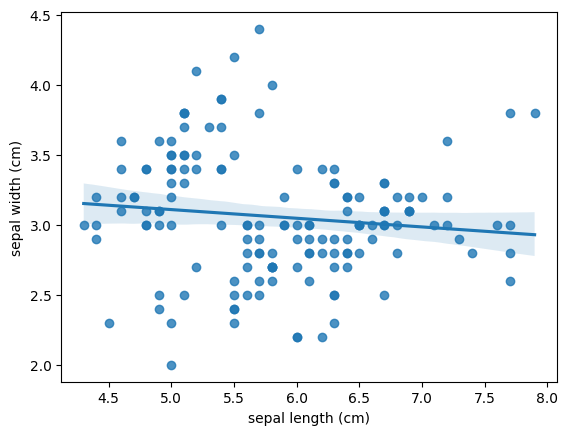

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Perform a simple linear regression
x = iris_df[['sepal length (cm)']]
y = iris_df['sepal width (cm)']
reg = LinearRegression().fit(x, y)

# Plot the data and the regression line
sns.regplot(x='sepal length (cm)', y='sepal width (cm)', data=iris_df)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: ignored

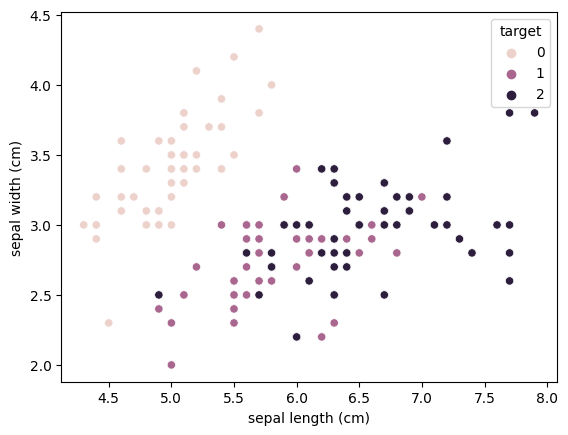

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Perform a logistic regression
x = iris_df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = iris_df['target']
clf = LogisticRegression(random_state=0).fit(x, y)

# Plot the data and the decision boundary
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='target')
xx, yy = np.mgrid[4:8:.01, 2:4.5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)
plt.show()


### **LSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Generate some sample data
data_dim = 16
timesteps = 8
num_classes = 10

x_train = np.random.random((1000, timesteps, data_dim))
y_train = np.random.random((1000, num_classes))

x_val = np.random.random((100, timesteps, data_dim))
y_val = np.random.random((100, num_classes))

# Create a Sequential model
model = Sequential()

# Add an LSTM layer with 32 units
model.add(LSTM(32, return_sequences=True,
               input_shape=(timesteps, data_dim)))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))

# Add a Dense output layer with 10 units (for the 10 classes)
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train,
          batch_size=64, epochs=50,
          validation_data=(x_val, y_val))


Epoch 1/50
16/16 [==============================] - 7s 97ms/step - loss: 11.5954 - accuracy: 0.1120 - val_loss: 11.8095 - val_accuracy: 0.0900
Epoch 2/50
16/16 [==============================] - 0s 16ms/step - loss: 12.1291 - accuracy: 0.1120 - val_loss: 12.0497 - val_accuracy: 0.1000
Epoch 3/50
16/16 [==============================] - 0s 17ms/step - loss: 12.2654 - accuracy: 0.1020 - val_loss: 12.1305 - val_accuracy: 0.1000
Epoch 4/50
16/16 [==============================] - 0s 17ms/step - loss: 12.3274 - accuracy: 0.1020 - val_loss: 12.1740 - val_accuracy: 0.1000
Epoch 5/50
16/16 [==============================] - 0s 16ms/step - loss: 12.3616 - accuracy: 0.1020 - val_loss: 12.1814 - val_accuracy: 0.1000
Epoch 6/50
16/16 [==============================] - 0s 15ms/step - loss: 12.3685 - accuracy: 0.1020 - val_loss: 12.1805 - val_accuracy: 0.1000
Epoch 7/50
16/16 [==============================] - 0s 17ms/step - loss: 12.3708 - accuracy: 0.1020 - val_loss: 12.1826 - val_accuracy: 0.1000

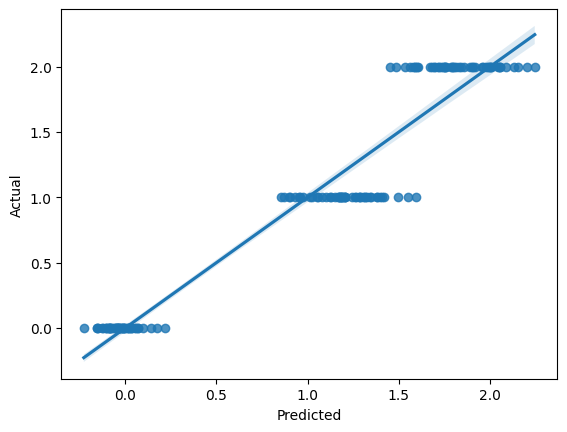

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

lm = LinearRegression()
lm.fit(X, y)

sns.regplot(x=lm.predict(X), y=y)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


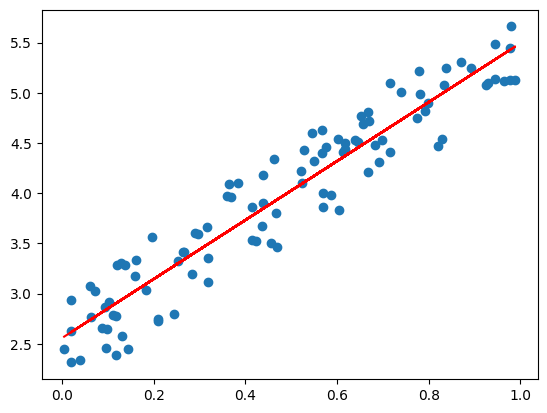

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create a dataset
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 + 3 * X + np.random.rand(100, 1)

# Convert the data into a pandas DataFrame
data = pd.DataFrame(data=np.hstack((X, y)), columns=['X', 'y'])

# Separate the features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Fit a linear regression model to the data
lm = LinearRegression()
lm.fit(X, y)

# Plot the data and the regression line
plt.scatter(X, y)
plt.plot(X, lm.predict(X), color='red')
plt.show()


### **LSTM**

In [ ]:
import torch
import torch.nn as nn
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Scale data
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

# Convert data to tensors
X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Define LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size=4, hidden_size=8, num_layers=1, num_classes=3):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.lstm(x.unsqueeze(1), (h0,c0))
        out = self.fc(out[:, -1, :])
        return out

# Initialize model
model = LSTM()

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Train model
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Test model
with torch.no_grad():
    correct = 0
    total = 0
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)
    total += y_test.size(0)
    correct += (predicted == y_test).sum().item()

print(f'Test Accuracy: {100 * correct / total}%')


Epoch [10/100], Loss: 1.0108
Epoch [20/100], Loss: 0.8432
Epoch [30/100], Loss: 0.6489
Epoch [40/100], Loss: 0.4842
Epoch [50/100], Loss: 0.3672
Epoch [60/100], Loss: 0.2880
Epoch [70/100], Loss: 0.2298
Epoch [80/100], Loss: 0.1840
Epoch [90/100], Loss: 0.1495
Epoch [100/100], Loss: 0.1240
Test Accuracy: 100.0%


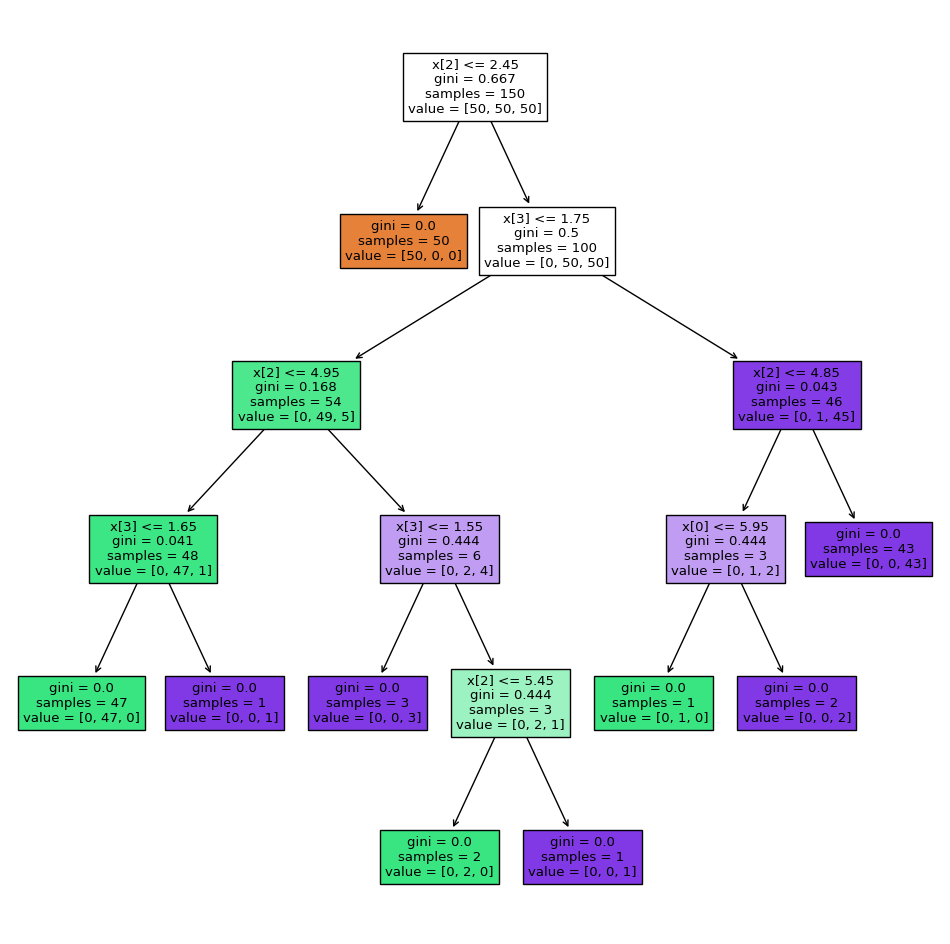

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Initialize decision tree classifier
clf = DecisionTreeClassifier()

# Train model
clf.fit(X, y)

# Visualize decision tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(clf, filled=True)
plt.show()


### **MULTIPLE LINEAR REGRESSION**

In [ ]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [ ]:
# import dataset
data=pd.read_csv("50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
data1=data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
data1

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
data1[data1.duplicated()] # No duplicated data

,RDS,ADMS,MKTS,State,Profit


In [ ]:
data1.describe()

,RDS,ADMS,MKTS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


**Correlation Analysis**

In [ ]:
data1.corr()

<ipython-input-11-73ca661ddaf0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()


,RDS,ADMS,MKTS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MKTS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


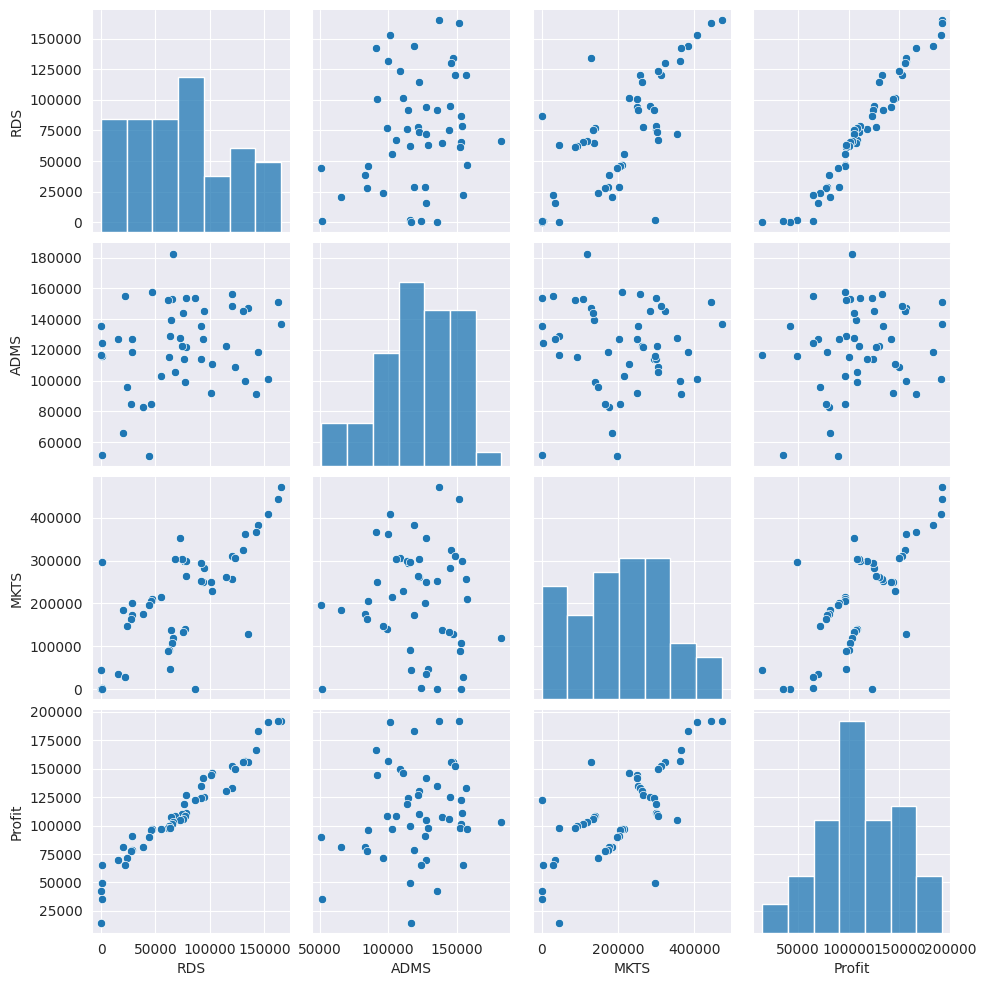

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

In [ ]:
#Model Building
model=smf.ols("Profit~RDS+ADMS+MKTS",data=data1).fit()

In [ ]:
#Model Testing
# Finding Coefficient parameters
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [ ]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept     7.626218
 RDS          17.846374
 ADMS         -0.525507
 MKTS          1.655077
 dtype: float64,
 Intercept    0.00000
 RDS          0.00000
 ADMS         0.60176
 MKTS         0.10472
 dtype: float64)

In [ ]:
# Finding rsquared values
model.rsquared , model.rsquared_adj  # Model accuracy is 94.75%

(0.9507459940683246, 0.9475337762901719)

In [ ]:
# Build SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'
# Also find their tvalues and pvalues
slr_a=smf.ols("Profit~ADMS",data=data1).fit()
slr_a.tvalues , slr_a.pvalues  # ADMS has in-significant pvalue

(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

In [ ]:
slr_m=smf.ols("Profit~MKTS",data=data1).fit()
slr_m.tvalues , slr_m.pvalues  # MKTS has significant pvalue

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [ ]:
#Model Validation
#Two Techniques: 1. Collinearity Check & 2. Residual Analysis
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RDS~ADMS+MKTS",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=data1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=data1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


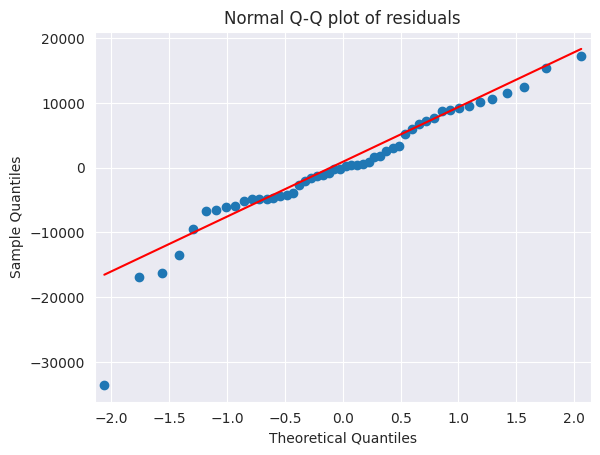

In [ ]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
list(np.where(model.resid<-30000))

[array([49])]

In [ ]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

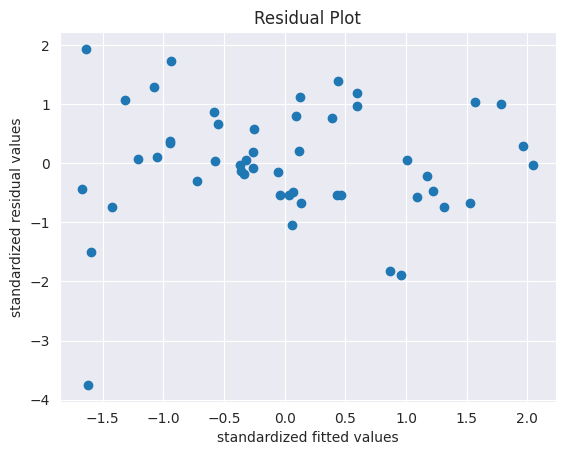

In [ ]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()

eval_env: 1


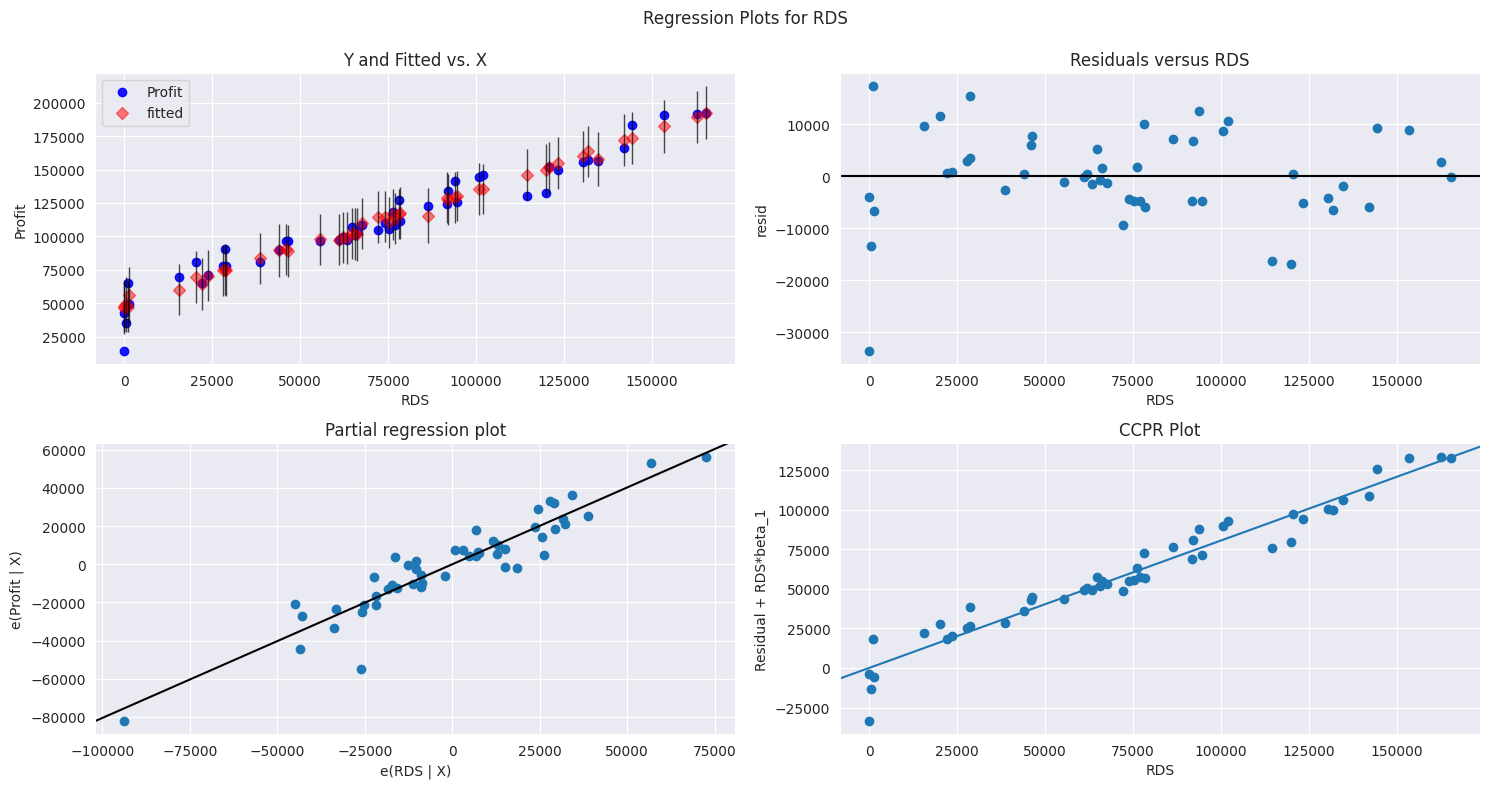

In [ ]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

eval_env: 1


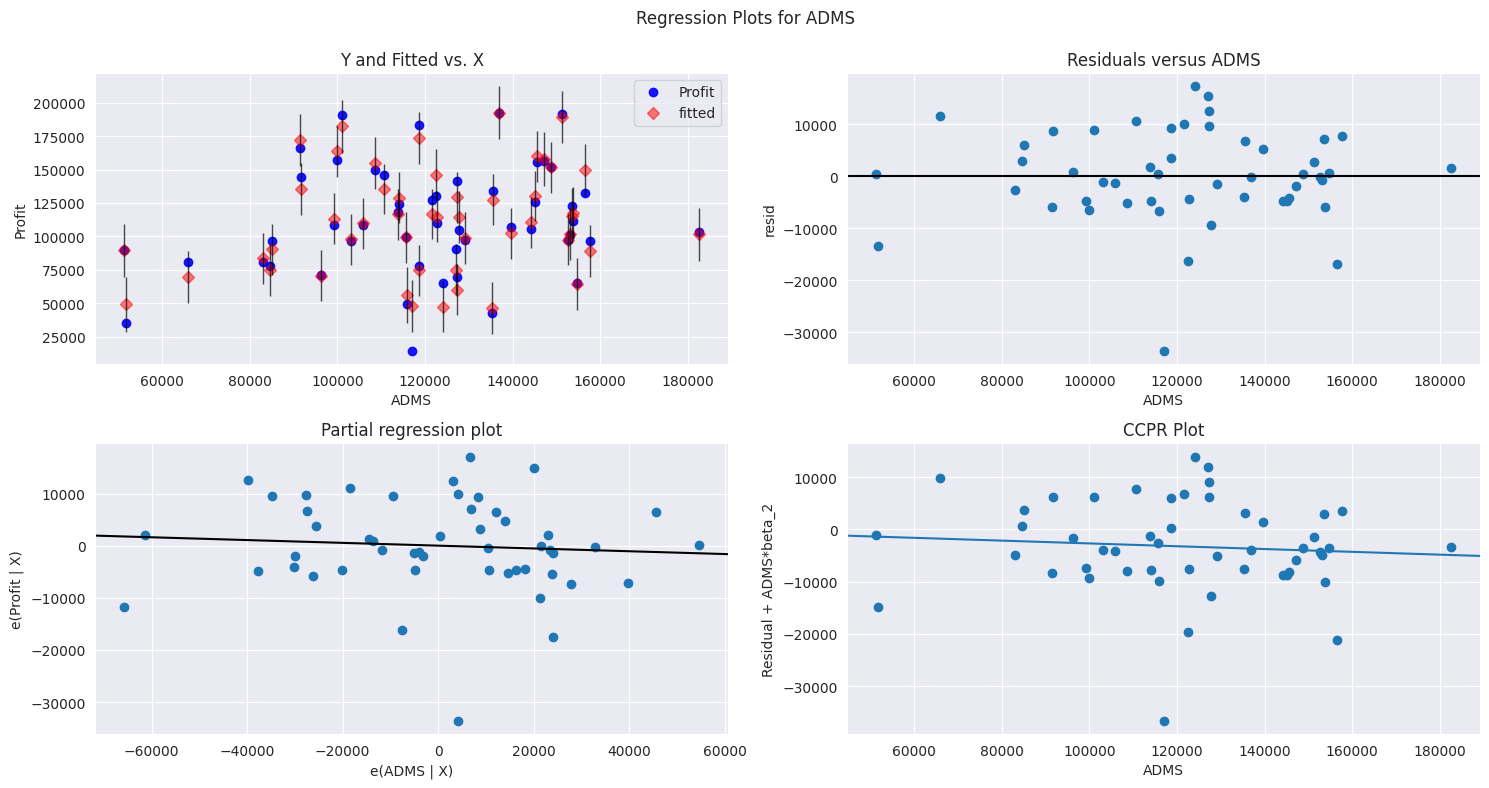

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)
plt.show()

eval_env: 1


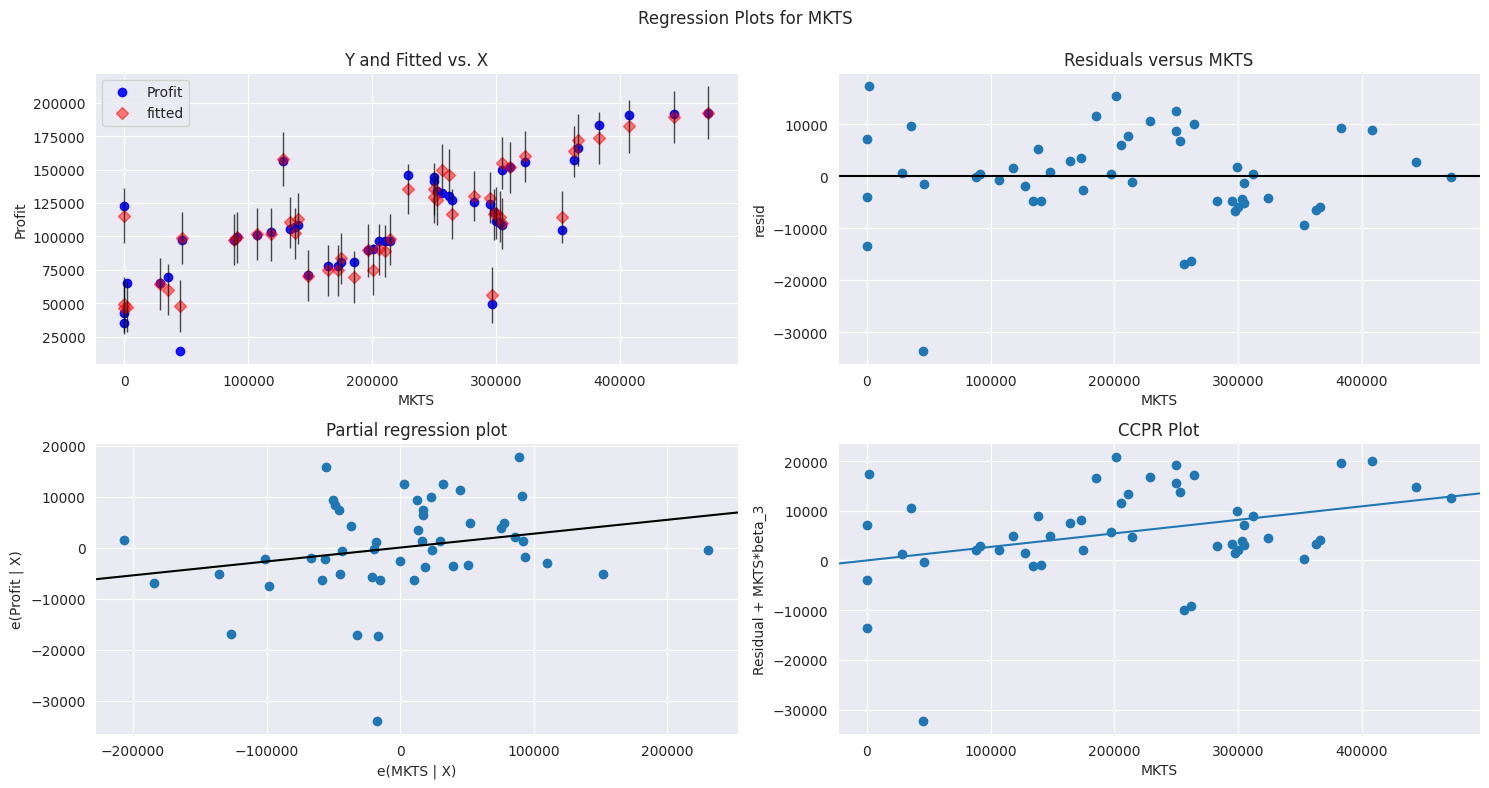

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

In [ ]:
#Model Deletion Diagnostics (checking Outliers or Influencers)
#Two Techniques : 1. Cook's Distance & 2. Leverage value
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

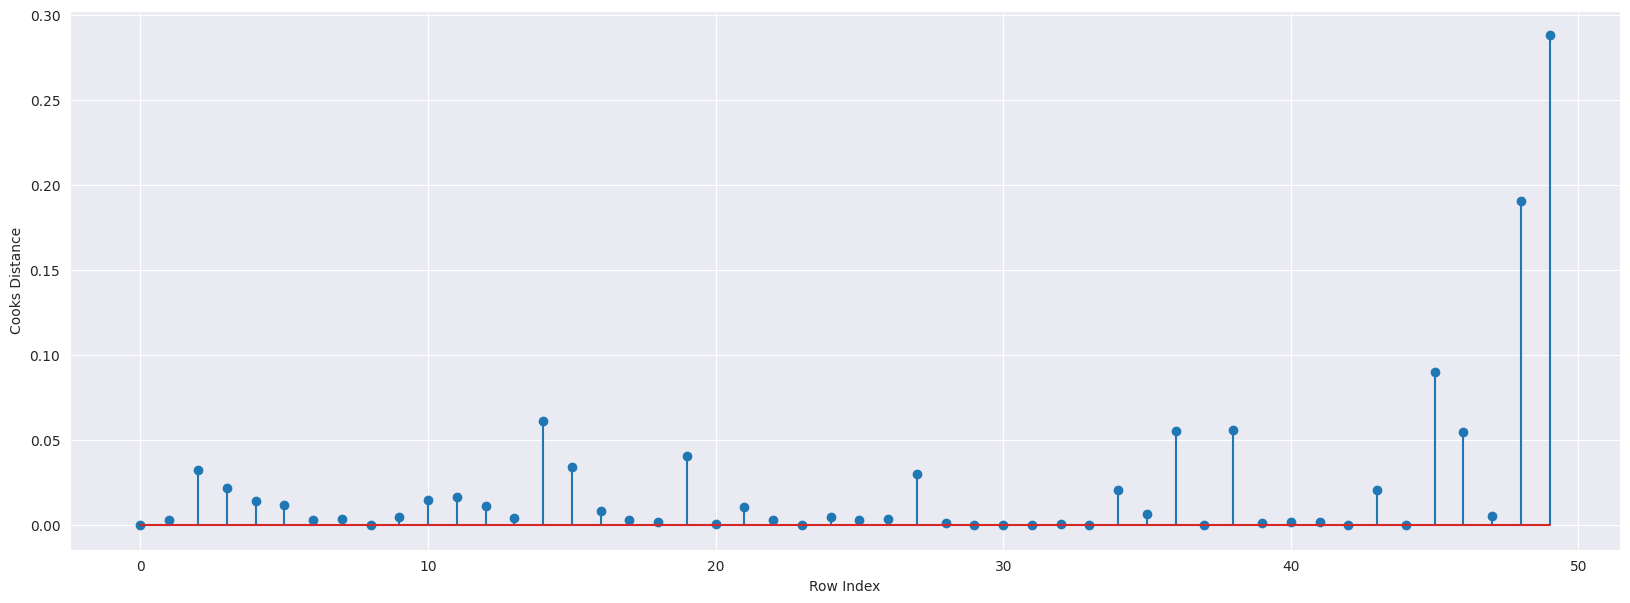

In [ ]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.2880822927543272)

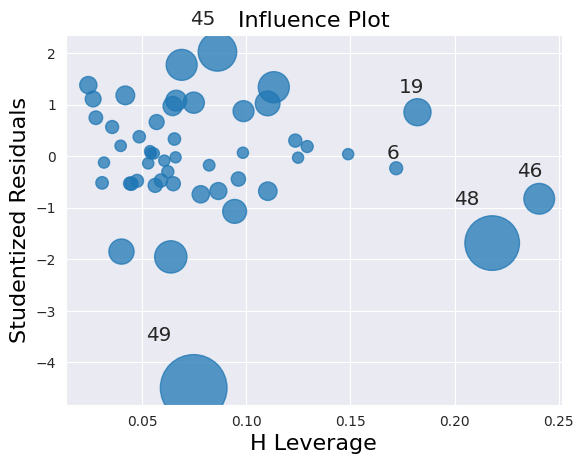

In [ ]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [ ]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [ ]:
data1[data1.index.isin([49])]

,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [ ]:
#Improving the Model
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [ ]:
#Model Deletion Diagnostics and Final Model
model2=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data2
    else:
        final_model=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209415
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779906
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.983114992639277
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improve

In [ ]:
final_model.rsquared

0.9882757054424702

In [ ]:
data2

,RDS,ADMS,MKTS,State,Profit
0,142107.34,91391.77,366168.42,Florida,166187.94
1,131876.90,99814.71,362861.36,New York,156991.12
2,130298.13,145530.06,323876.68,Florida,155752.60
3,120542.52,148718.95,311613.29,New York,152211.77
4,123334.88,108679.17,304981.62,California,149759.96
5,91992.39,135495.07,252664.93,California,134307.35
6,94657.16,145077.58,282574.31,New York,125370.37
7,91749.16,114175.79,294919.57,Florida,124266.90
8,76253.86,113867.30,298664.47,California,118474.03
9,67532.53,105751.03,304768.73,Florida,108733.99


In [ ]:
#Model Predictions
# say New data for prediction is
new_data=pd.DataFrame({'RDS':70000,"ADMS":90000,"MKTS":140000},index=[0])
new_data

,RDS,ADMS,MKTS
0,70000,90000,140000


In [ ]:
# Manual Prediction of Price
final_model.predict(new_data)

0    104858.729408
dtype: float64

In [ ]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(data2)
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

In [ ]:
#Table containing R^2 value for each prepared model
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.988276


In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

iris = datasets.load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

tree_rules = export_text(clf, feature_names=iris['feature_names'])
print(tree_rules)


|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- sepal length (cm) <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.95
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



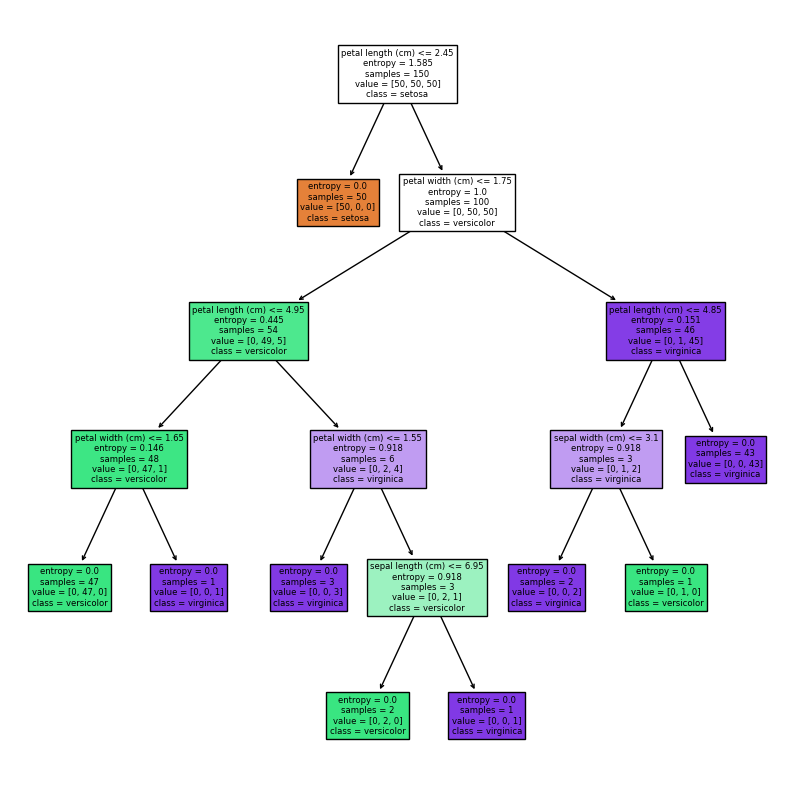

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

iris = datasets.load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

plt.figure(figsize=(10, 10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()
